In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
df = pd.read_csv('datasetcovid.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [106]:
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [107]:
good_columns=['AGE', 'DATE_DIED','CLASIFFICATION_FINAL']
df = df[good_columns]


In [108]:
df = df[(df.DATE_DIED != '9999-99-99')]
df = df[(df.CLASIFFICATION_FINAL == 2) | (df.CLASIFFICATION_FINAL == 3)| (df.CLASIFFICATION_FINAL == 1)]
df.shape

(54236, 3)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54236 entries, 0 to 1047638
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AGE                   54236 non-null  int64 
 1   DATE_DIED             54236 non-null  object
 2   CLASIFFICATION_FINAL  54236 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [149]:
df.head()

,AGE,DATE_DIED,CLASIFFICATION_FINAL,YEAR_DIED,MONTH_DIED,IDADE_GRUPO
0,65,2020-05-03,3- High,2020,5,"(63, 71]"
2,55,2020-06-09,3- High,2020,6,"(47, 55]"
4,68,2020-06-21,3- High,2020,6,"(63, 71]"
336,47,2020-03-28,3- High,2020,3,"(39, 47]"
337,43,2020-03-29,3- High,2020,3,"(39, 47]"


In [111]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%d/%m/%Y')
df = df[~(df['DATE_DIED'].dt.year == 2021)]

In [112]:
df_age=df['AGE'].value_counts().sort_index()
print(df_age)

AGE
0      48
1      38
2       9
3       5
4       5
       ..
100    14
101     5
102     1
103     1
119     1
Name: count, Length: 105, dtype: int64


In [113]:
media = df['AGE'].mean()
print(f"media: {media}")

media: 61.51958190731662


In [127]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].replace({1:'1- low ', 2:'2- Moderated', 3:'3- High'})

In [116]:
df['YEAR_DIED'] = df['DATE_DIED'].dt.year
year_counts = df['YEAR_DIED'].value_counts()
print(year_counts)

YEAR_DIED
2020    54055
Name: count, dtype: int64


In [117]:
df.head()

,AGE,DATE_DIED,CLASIFFICATION_FINAL,YEAR_DIED
0,65,2020-05-03,3,2020
2,55,2020-06-09,3,2020
4,68,2020-06-21,3,2020
336,47,2020-03-28,3,2020
337,43,2020-03-29,3,2020


In [150]:
classification_counts= df['CLASIFFICATION_FINAL'].value_counts().to_frame().reset_index().sort_values(by = 'CLASIFFICATION_FINAL')
classification_counts_total= df['CLASIFFICATION_FINAL'].value_counts().to_frame().reset_index().sort_values( by ='CLASIFFICATION_FINAL')
classification_counts.columns = ['COVID-19 classification', 'Number of deaths']
classification_counts_total.columns = ['COVID-19 classification', 'Number of deaths']
classification_dies = classification_counts['Number of deaths'].sum()
classification_dies = classification_counts_total['Number of deaths'].sum()
total_classification_dies = pd.DataFrame({'COVID-19 classification': ['Total'], 'Number of deaths': [classification_dies]})
classification_counts_total = pd.concat([classification_counts, total_classification_dies], ignore_index= True)
################################
frequencia_relativa_classification = classification_counts_total['Number of deaths']/classification_dies
frequencia_relativa_classification_percent = frequencia_relativa_classification * 100
classification_counts_total['Frequencia relativa'] = frequencia_relativa_classification
classification_counts_total['Frequencia relativa %'] = frequencia_relativa_classification_percent.round(1)
classification_counts_total['Frequencia acumulada'] = classification_counts_total['Number of deaths'].cumsum().round(2)

print(classification_counts_total)

  COVID-19 classification  Number of deaths  Frequencia relativa  \
0                 1- low                942             0.017427   
1            2- Moderated              1840             0.034039   
2                 3- High             51273             0.948534   
3                   Total             54055             1.000000   

   Frequencia relativa %  Frequencia acumulada  
0                    1.7                   942  
1                    3.4                  2782  
2                   94.9                 54055  
3                  100.0                108110  


In [135]:
## We split the month, then calculate the number of died patients and calculate the total.
df['MONTH_DIED'] = df['DATE_DIED'].dt.month
month_counts = df['MONTH_DIED'].value_counts().to_frame().reset_index().sort_values(by='MONTH_DIED', ascending= True)
month_counts_total = df['MONTH_DIED'].value_counts().to_frame().reset_index().sort_values(by='MONTH_DIED', ascending= True)
month_counts.columns = ['Month', 'Number of deaths']
month_counts_total.columns = ['Month', 'Number of deaths']
allmonth_dies = month_counts_total['Number of deaths'].sum()
total_month_dies = pd.DataFrame({'Month': ['Total'], 'Number of deaths': [allmonth_dies]})
month_counts_total = pd.concat([month_counts, total_month_dies], ignore_index= True)
#####################
frequencia_relativa_month = month_counts_total['Number of deaths']/allmonth_dies
frequencia_relativa_month_percent = frequencia_relativa_month * 100
month_counts_total['Frequencia relativa'] = frequencia_relativa_month
month_counts_total['Frequencia relativa %'] = frequencia_relativa_month_percent.round(2)
month_counts_total['Frequencia acumulada'] = month_counts_total['Number of deaths'].cumsum().round(2)


print(month_counts_total)

    Month  Number of deaths  Frequencia relativa  Frequencia relativa %  \
0       2                 1             0.000018                   0.00   
1       3                84             0.001554                   0.16   
2       4              3908             0.072297                   7.23   
3       5             13788             0.255074                  25.51   
4       6             18928             0.350162                  35.02   
5       7             16342             0.302322                  30.23   
6       8               910             0.016835                   1.68   
7       9                61             0.001128                   0.11   
8      10                13             0.000240                   0.02   
9      11                 6             0.000111                   0.01   
10     12                14             0.000259                   0.03   
11  Total             54055             1.000000                 100.00   

    Frequencia acumulada

In [120]:
k = 1 + 3.3* np.log10(54055)
print(k)

f = 120/k
print(f)

16.61835837655693
7.2209298464330125


In [131]:


faixas_etarias = [-1, 7, 15, 23, 31, 39, 47, 55 , 63, 71, 79, 85, 93, 101, 109, 117, 125]

df['IDADE_GRUPO'] = pd.cut(df['AGE'], bins=faixas_etarias) 
contagem_por_grupo = df['IDADE_GRUPO'].value_counts().to_frame().reset_index().sort_values(by = 'IDADE_GRUPO', ascending = True)
contagem_por_grupo_total = df['IDADE_GRUPO'].value_counts().to_frame().reset_index().sort_values(by = 'IDADE_GRUPO', ascending = True)

contagem_por_grupo.columns = ['Age', 'Number of dead']
contagem_por_grupo_total.columns = ['Age', 'Number of dead']

all_dies = contagem_por_grupo_total['Number of dead'].sum()
total_dies = pd.DataFrame({'Age': ['Total'], 'Number of dead': [all_dies]})
contagem_por_grupo_total = pd.concat([contagem_por_grupo, total_dies], ignore_index=True)
#####
frequencia_relativa_age = contagem_por_grupo_total['Number of dead']/all_dies
frequencia_relativa_age_percent = frequencia_relativa_age * 100
contagem_por_grupo_total['Frequencia_relativa']= frequencia_relativa_age
contagem_por_grupo_total['Frequencia_relativa %'] =frequencia_relativa_age_percent.round(1)
contagem_por_grupo_total['Frequencia acumulada'] = contagem_por_grupo_total['Number of dead'].cumsum().round(2)
print(contagem_por_grupo_total)

           Age  Number of dead  Frequencia_relativa  Frequencia_relativa %  \
0      (-1, 7]             119             0.002201                    0.2   
1      (7, 15]              52             0.000962                    0.1   
2     (15, 23]             204             0.003774                    0.4   
3     (23, 31]             885             0.016372                    1.6   
4     (31, 39]            2198             0.040662                    4.1   
5     (39, 47]            5134             0.094977                    9.5   
6     (47, 55]            8770             0.162242                   16.2   
7     (55, 63]           11761             0.217575                   21.8   
8     (63, 71]           11488             0.212524                   21.3   
9     (71, 79]            8061             0.149126                   14.9   
10    (79, 85]            3524             0.065193                    6.5   
11    (85, 93]            1647             0.030469             

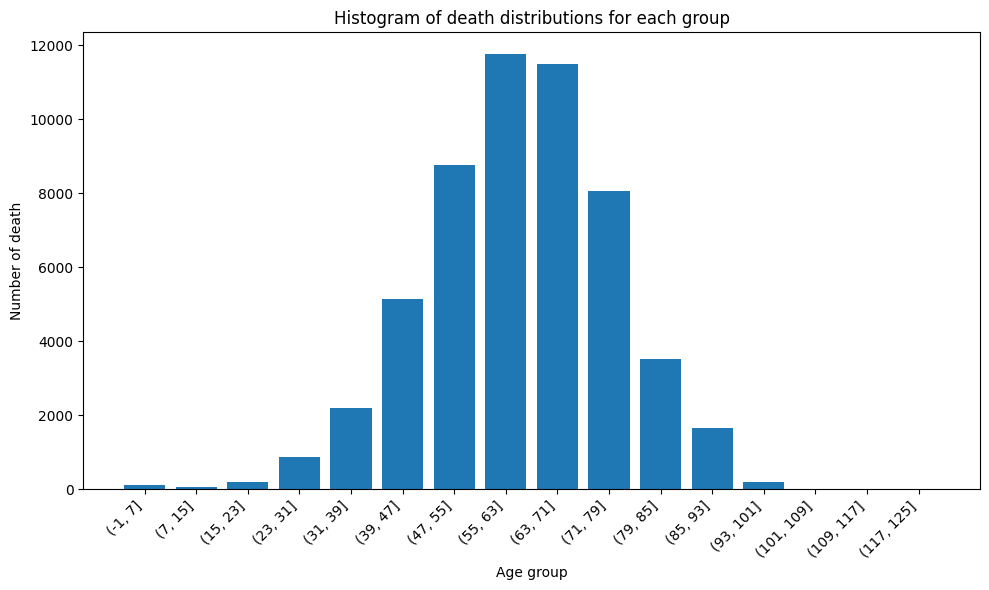

In [122]:
contagem_por_grupo['Age'] = contagem_por_grupo['Age'].astype(str)

plt.figure(figsize=(10, 6)) 
plt.bar(contagem_por_grupo['Age'], contagem_por_grupo['Number of dead'])

plt.xlabel('Age group')
plt.ylabel('Number of death')
plt.title('Histogram of death distributions for each group')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

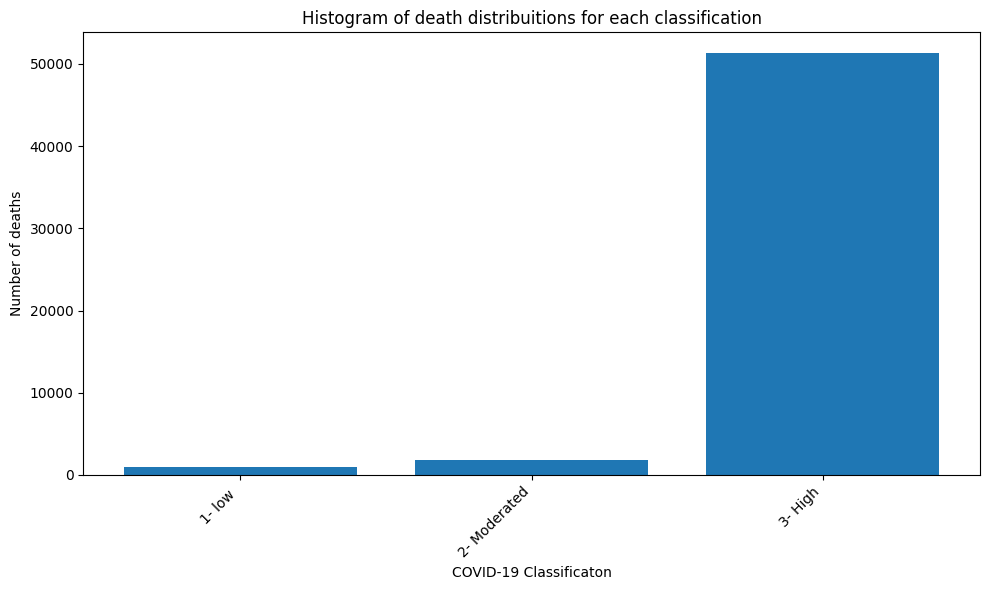

In [129]:
classification_counts['COVID-19 classification'] =classification_counts['COVID-19 classification'].astype(str)
plt.figure(figsize=(10, 6))  
plt.bar(classification_counts['COVID-19 classification'], classification_counts['Number of deaths'])


plt.xlabel('COVID-19 Classificaton')
plt.ylabel('Number of deaths')
plt.title('Histogram of death distribuitions for each classification')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

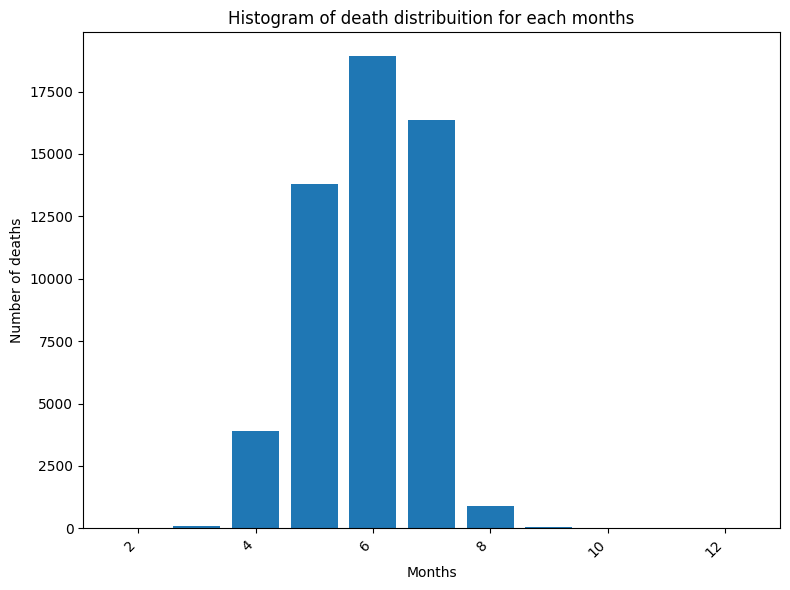

In [124]:
plt.figure(figsize=(8, 6))  
plt.bar(month_counts['Month'], month_counts['Number of deaths'])


plt.xlabel('Months')
plt.ylabel('Number of deaths')
plt.title('Histogram of death distribuition for each months')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Moda = linha com maior frequencia
Moda age = 7     55 + 63/2 (59)
Moda month= 4       6             18928
moda class =    51273  HIGH

Mediana age  -> 7 55+63/2 = 59

In [125]:
month_counts.T

,10,5,3,2,0,1,4,6,8,9,7
Month,2,3,4,5,6,7,8,9,10,11,12
Number of deaths,1,84,3908,13788,18928,16342,910,61,13,6,14


In [133]:
soma = month_counts_total['Frequencia relativa'].sum()
print(soma)
media = soma/11
print(media)

2.0
0.18181818181818182


In [130]:
classification_counts.T

,2,1,0
COVID-19 classification,1- low,2- Moderated,3- High
Number of deaths,942,1840,51273


In [137]:
# media de mortes por classe
print('Média {}'.format(classification_counts['Number of deaths'].mean()))

Média 18018.333333333332


In [140]:
## media de morte por meses
print('Média {}'.format(month_counts.mean()))

Média Month                  7.000000
Number of deaths    4914.090909
dtype: float64


In [148]:
# media de morte por grupo
media = contagem_por_grupo['Number of dead'].mean()
print(media)

3378.4375


In [155]:
IQR_sal = month_counts.quantile(0.75) - month_counts.quantile(0.25)
np.round(IQR_sal,2)

Month                  5.0
Number of deaths    8834.5
dtype: float64